In [1]:
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

for page in range(0,23): #Remember to update the number of pages 
    url = 'https://www.metacritic.com/game/pc/hogwarts-legacy/user-reviews?page='+str(page)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response  = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'):
        if review.find('div', class_='name') == None:
                       break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)

hp_reviews = pd.DataFrame(review_dict)

In [3]:
hp_reviews.head(51)

,name,date,rating,review
0,love2watchp,"Feb 12, 2023",6,Good sides:\r1) Good music and sound effects\r...
1,DavidFCorreia,"Feb 8, 2023",10,We all have to put out there for this studio t...
2,NakataGOAT,"Feb 8, 2023",10,"It is the perfect Game for a Harry Potter Fan,..."
3,Spped14,"Feb 8, 2023",10,I'm in love with this Game!!! The visuals are ...
4,BulgarianCritic,"Feb 8, 2023",9,I have never watched or played any Harry Potte...
5,Andrews3,"Feb 10, 2023",5,To be Fair - i dont see why all of these 10/10...
6,Zquaranteneuf,"Feb 24, 2023",5,This game is certainly a product that exists. ...
7,Holydrago,"Feb 28, 2023",5,Graphics 9/10Quests 4.5/10Story 4.5/10Sounds 6...
8,AcerolaOrion,"Mar 1, 2023",5,Insanely mediocre and incredibly poorly review...
9,Sicusino,"Feb 15, 2023",6,It isn't that good. I never read the books but...


In [4]:
hp_df = hp_reviews["review"]
hp_df=pd.DataFrame(hp_df)

In [5]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

# Removing accented Characters

In [6]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [7]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [8]:
hp_df['review']=hp_df['review'].apply(remove_accented_chars).apply(remove_special_characters)

In [9]:
hp_df

,review
0,Good sides\r1 Good music and sound effects\r2 ...
1,We all have to put out there for this studio t...
2,It is the perfect Game for a Harry Potter Fan ...
3,Im in love with this Game The visuals are amaz...
4,I have never watched or played any Harry Potte...
...,...
474,Incredibly high minimum requirements The graph...
475,Great game overall It has so much content whic...
476,Extremely poor optimization Stuttering non sto...
477,\r1 \r2 \r3


# Stemming

In [10]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [11]:
hp_df['review']=hp_df['review'].apply(simple_stemmer)

In [12]:
hp_df.head()

,review
0,good side 1 good music and sound effect 2 worl...
1,We all have to put out there for thi studio to...
2,It is the perfect game for a harri potter fan ...
3,Im in love with thi game the visual are amaz t...
4,I have never watch or play ani harri potter mo...


In [13]:
# Removing stop words

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lokes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [16]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [18]:
hp_df['review']=hp_df['review'].apply(remove_stopwords)

In [19]:
hp_df

,review
0,good side 1 good music sound effect 2 world st...
1,put thi studio know thi game good love hard wo...
2,perfect game harri potter fan enjoy everi seco...
3,Im love thi game visual amaz soundtrack stori ...
4,never watch play ani harri potter moviesgam ze...
...,...
474,incred high minimum requir graphic requir poor...
475,great game overal ha much content provid total...
476,extrem poor optim stutter non stop even lowish...
477,1 2 3


In [29]:
# Sentiment Analysis

In [21]:
#! pip install afinn

In [22]:
from afinn import Afinn

In [23]:
af=Afinn()

In [24]:
sent_score=[af.score(x) for x in hp_df['review']]

In [25]:
sent_score

[6.0,
 7.0,
 8.0,
 3.0,
 14.0,
 8.0,
 -5.0,
 4.0,
 -2.0,
 11.0,
 -7.0,
 9.0,
 12.0,
 -2.0,
 22.0,
 -1.0,
 3.0,
 -3.0,
 1.0,
 -5.0,
 5.0,
 2.0,
 -1.0,
 9.0,
 11.0,
 10.0,
 12.0,
 9.0,
 0.0,
 12.0,
 4.0,
 3.0,
 0.0,
 1.0,
 0.0,
 16.0,
 0.0,
 7.0,
 0.0,
 5.0,
 2.0,
 12.0,
 6.0,
 2.0,
 5.0,
 15.0,
 0.0,
 6.0,
 4.0,
 6.0,
 8.0,
 2.0,
 14.0,
 41.0,
 12.0,
 6.0,
 13.0,
 18.0,
 4.0,
 3.0,
 -1.0,
 -2.0,
 -4.0,
 4.0,
 23.0,
 22.0,
 14.0,
 9.0,
 8.0,
 13.0,
 12.0,
 21.0,
 6.0,
 15.0,
 2.0,
 19.0,
 3.0,
 3.0,
 8.0,
 3.0,
 33.0,
 -9.0,
 35.0,
 3.0,
 -2.0,
 7.0,
 4.0,
 5.0,
 5.0,
 14.0,
 3.0,
 3.0,
 3.0,
 -1.0,
 8.0,
 2.0,
 0.0,
 12.0,
 3.0,
 0.0,
 6.0,
 4.0,
 0.0,
 10.0,
 8.0,
 -3.0,
 5.0,
 6.0,
 15.0,
 4.0,
 9.0,
 7.0,
 2.0,
 -3.0,
 13.0,
 -6.0,
 6.0,
 10.0,
 11.0,
 3.0,
 5.0,
 9.0,
 -1.0,
 3.0,
 16.0,
 23.0,
 0.0,
 2.0,
 9.0,
 13.0,
 7.0,
 6.0,
 2.0,
 12.0,
 5.0,
 6.0,
 4.0,
 3.0,
 0.0,
 0.0,
 5.0,
 3.0,
 -8.0,
 28.0,
 12.0,
 12.0,
 6.0,
 4.0,
 6.0,
 31.0,
 0.0,
 2.0,
 3.0,
 4.0,
 19.0,
 18.0,
 4

In [26]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sent_score]

In [27]:
hp_df['sent_score'] = sent_score


In [28]:
hp_df

,review,sent_score
0,good side 1 good music sound effect 2 world st...,6.0
1,put thi studio know thi game good love hard wo...,7.0
2,perfect game harri potter fan enjoy everi seco...,8.0
3,Im love thi game visual amaz soundtrack stori ...,3.0
4,never watch play ani harri potter moviesgam ze...,14.0
...,...,...
474,incred high minimum requir graphic requir poor...,-3.0
475,great game overal ha much content provid total...,-1.0
476,extrem poor optim stutter non stop even lowish...,-1.0
477,1 2 3,0.0


In [30]:
hp_df['sentiment_category'] = sentiment_category

In [31]:
hp_df

,review,sent_score,sentiment_category
0,good side 1 good music sound effect 2 world st...,6.0,positive
1,put thi studio know thi game good love hard wo...,7.0,positive
2,perfect game harri potter fan enjoy everi seco...,8.0,positive
3,Im love thi game visual amaz soundtrack stori ...,3.0,positive
4,never watch play ani harri potter moviesgam ze...,14.0,positive
...,...,...,...
474,incred high minimum requir graphic requir poor...,-3.0,negative
475,great game overal ha much content provid total...,-1.0,negative
476,extrem poor optim stutter non stop even lowish...,-1.0,negative
477,1 2 3,0.0,neutral


In [32]:
import matplotlib.pyplot as plt

<AxesSubplot:>

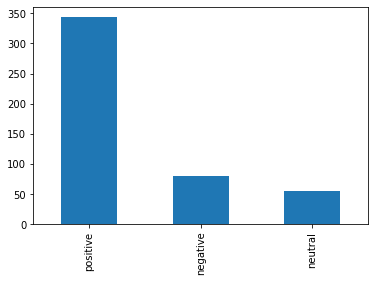

In [33]:
hp_df['sentiment_category'].value_counts().plot(kind='bar')

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
#! pip install wordcloud

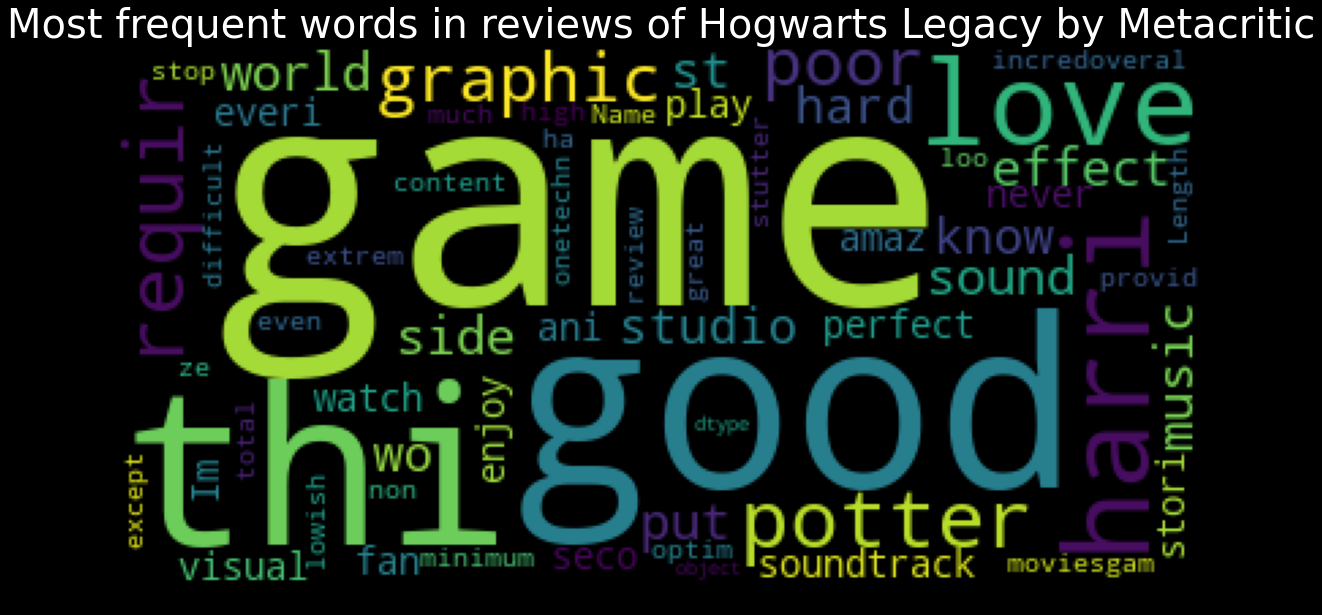

In [39]:
wc=WordCloud()
wc.generate(str(hp_df['review']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in reviews of Hogwarts Legacy by Metacritic", fontsize=40,color='white')
plt.imshow(wc)
plt.show()